In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pollution = pd.read_csv("../Data/pollution.csv")

In [3]:
pollution_type = 'Ozone'
state_choice =  "AK"

X = pollution.Year.unique()
y = pollution[pollution['State']==state_choice][pollution_type].values


X= X.reshape(-1, 1)
y= y.reshape(-1, 1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

array([[2013.],
       [2007.],
       [2012.],
       [2001.],
       [2008.],
       [2015.],
       [2003.],
       [2006.],
       [2009.],
       [2011.],
       [2002.],
       [2005.]])

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

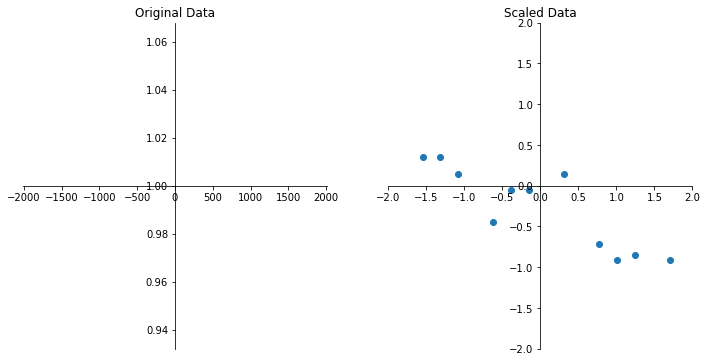

In [7]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train.max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train, y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [8]:
# Plot the results 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(MSE,r2)

1.559262227548461 -2.3686276846820604


In [9]:
X_predict=[2019, 2020, 2021, 2022, 2023, 2024, 2025]



In [10]:
X_predict = np.asarray(X_predict)




In [11]:
X_predict = X_predict.reshape(-1,1)

In [12]:

X_predict_scaled = X_scaler.transform(X_predict)

In [13]:
predictions = model.predict(X_predict)

In [14]:
predictions


array([[-782.58734133],
       [-782.97495269],
       [-783.36256405],
       [-783.75017542],
       [-784.13778678],
       [-784.52539814],
       [-784.9130095 ]])

In [15]:
# Plot the results 
from sklearn.linear_model import Lasso

model = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(MSE,r2)

1.5380136439872323 -2.3227222778941496


In [16]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [17]:
data = pd.DataFrame(np.column_stack([X,y]), columns=['x','y'])

In [18]:


for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1999.0,0.054,3996001.0,7.988006e+09,1.596802e+13,3.192008e+16,6.380824e+19,1.275527e+23,2.549778e+26,5.097006e+29,1.018892e+33,2.036764e+36,4.071491e+39,8.138911e+42,1.626968e+46,3.252310e+49
1,2000.0,0.044,4000000.0,8.000000e+09,1.600000e+13,3.200000e+16,6.400000e+19,1.280000e+23,2.560000e+26,5.120000e+29,1.024000e+33,2.048000e+36,4.096000e+39,8.192000e+42,1.638400e+46,3.276800e+49
2,2001.0,0.055,4004001.0,8.012006e+09,1.603202e+13,3.208008e+16,6.419224e+19,1.284487e+23,2.570258e+26,5.143086e+29,1.029132e+33,2.059292e+36,4.120644e+39,8.245408e+42,1.649906e+46,3.301462e+49
3,2002.0,0.055,4008004.0,8.024024e+09,1.606410e+13,3.216032e+16,6.438496e+19,1.288987e+23,2.580552e+26,5.166265e+29,1.034286e+33,2.070641e+36,4.145423e+39,8.299137e+42,1.661487e+46,3.326298e+49
4,2003.0,0.054,4012009.0,8.036054e+09,1.609622e+13,3.224072e+16,6.457816e+19,1.293501e+23,2.590882e+26,5.189536e+29,1.039464e+33,2.082047e+36,4.170339e+39,8.353190e+42,1.673144e+46,3.351307e+49


In [19]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

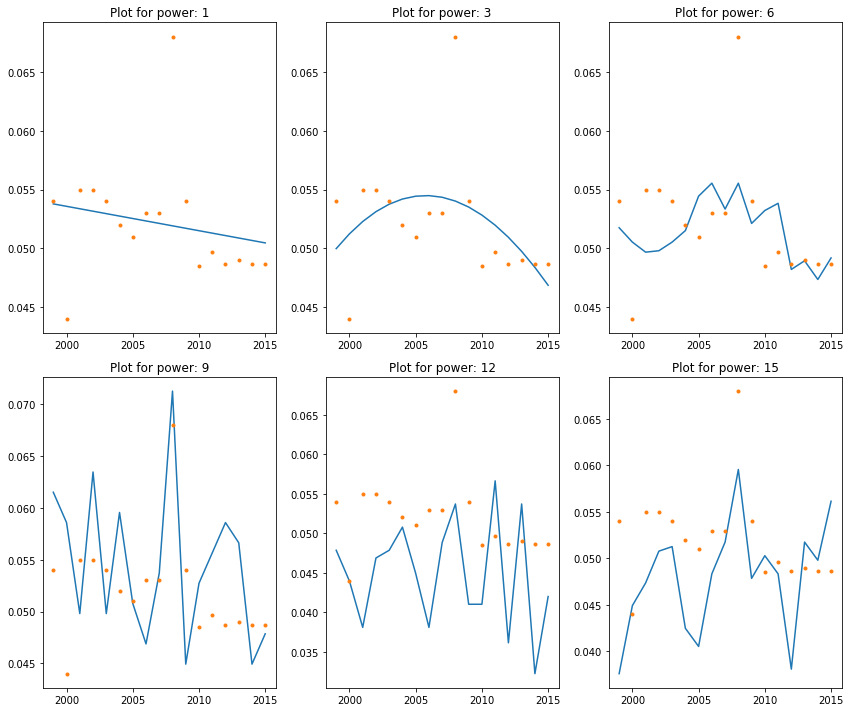

In [20]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [21]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,0.0004,0.47,-0.00021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,0.00033,-3.7e+02,0.37,-9.2e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.00033,-5.2e+03,7.6,-0.0037,5.9e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.0003,5.5e+07,-1.1e+05,83,-0.027,3.4e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.0003,-8.6e+09,2.1e+07,-2.1e+04,11,-0.0027,2.6e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.00033,9.7e+11,-2.9e+09,3.6e+06,-2.4e+03,0.9,-0.00018,1.5e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.00029,-1.5e+12,3.9e+09,-3.9e+06,1.7e+03,-0.096,-0.0002,7.1e-08,-7.8e-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.00031,1.4e+12,-3.1e+09,2.1e+06,-3.1e+02,-0.013,-0.00027,2.3e-07,-6.8e-11,7.2e-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.0008,5.3e+12,-1.4e+10,1.3e+07,-3.5e+03,-2.2,0.0014,1.5e-07,-3.1e-10,9.3e-14,-9.2e-18,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.00058,-2.1e+12,4.9e+09,-3.2e+06,-5.3e+02,1.2,-0.00028,1.7e-07,-3.5e-10,2.2e-13,-6e-17,5.9e-21,NaN,NaN,NaN,NaN,NaN
